# Grid notation of permutations

## Libraries

In [8]:
import random
import sympy
sympy.init_printing()

from ipywidgets import interact

# import plotly.graph_objects as go

# ----- Debugger -----
# from IPython.core.debugger import Pdb; Pdb().set_trace()
# --------------------

In [2]:
import sys
sys.path.append("../modules")

import Permutations as pm
from Grid import *

## Grid notation

In [17]:
def get_grid(N):
    img = list(range(N)); random.shuffle(img)

    prm = pm.Permutation(img)
    display(sympy.Matrix(prm.two_line()))  # , prm.image, prm.size)
    cd = pm.cycle_decomp(prm); print("{}, {}".format(cd, len(cd)))

    return Grid(prm)

In [25]:
interact(show_grid, N=10);

interactive(children=(IntSlider(value=10, description='N', max=30, min=-10), Output()), _dom_classes=('widget-…

## Sequence of reduction

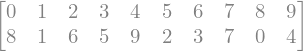

[[8, 0], [1], [6, 3, 5, 2], [9, 4], [7]], 5
+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   | 1 |   |
+---+---+---+---+---+---+---+---+---+
|   | 1 |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   | 2 |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 1 |
+---+---+---+---+---+---+---+---+---+
|   |   |   | 1 |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   | 1 |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   | 1 |   |   |
+---+---+---+---+---+---+---+---+---+
| 1 |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   |   | 1 |   |   |   |   |
+---+---+---+---+---+---+---+---+---+

TL ↓   nums = []

+---+---+---+---+---+---+---+
| 1 |   |   |   |   |   |   |
+---+---+---+---+---+---+---+
|   |   |   |   | 2 |   |   |
+---+---+---+---+---+---+---+
|   |   |   |   |   |   | 1 |
+---+---+---+---+---+---+---+
|   |

In [26]:
grid = get_grid(10); grid.show()#; print("\n↓ \n")
nums = []

while grid.size > 1:
    bln = False if random.randint(0,1) == 0 else True
    new = grid.transform(bln)
    if type(new) == dict:
        nums += [new["num"]]
        grid = new["grid"]
    else:
        grid = new
    #---
    print("\n{} ↓   nums = {}\n".format("BR" if bln else "TL",nums))
    grid.show()
else:
    nums += [grid.matrix[0][0]]
    print("numbers:{}, total:{}".format(nums, sum(nums)))

## About permutation matrices

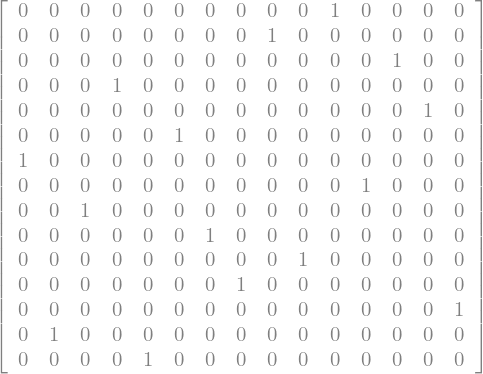

In [5]:
A = sympy.Matrix(prm.matrix())
display(A)

I = sympy.eye(N)
t = sympy.symbols('t')

dt = (I-t*A).det()
display(dt, dt.factor())

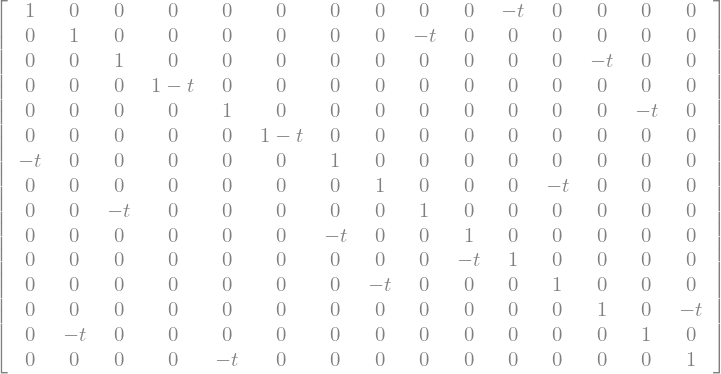

In [6]:
display(I-t*A)

In [7]:
pol = (1-t**2)**3*(1-t**9)
display(pol, pol.expand())